In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.python import cross_val_score
# from xgboost import XGBRegressor

In [3]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [4]:
df = pd.read_csv(r"C:\Users\josep\Documents\Joseph\crater\M3_data.csv")
df2 = df

In [5]:
df = df2


In [6]:
df.iloc[:,4:len(df)]
# df.head()

,565.79,575.77,585.76,595.74,605.72,615.7,625.68,635.66,645.64,655.62,...,2851.44,2861.42,2871.4,2881.38,2891.36,2901.34,2911.32,2921.3,2931.28,2941.26
0,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,...,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188,0.042188
1,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,...,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568,0.042568
2,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,...,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146,0.043146
3,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,...,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957,0.040957
4,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,...,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144,0.040144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179923,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,...,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051
179924,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,...,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051,0.028051
179925,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,...,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515,0.027515
179926,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,...,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232,0.027232


In [7]:
sc = StandardScaler().fit_transform(df)
# print(scaled)

In [8]:
cov = (sc.T @ sc) / (sc.shape[0] - 1) ## @ is matrix mult
# print(cov)
eig_values, eig_vectors = np.linalg.eig(cov)
print(eig_values)

[ 2.39314263e+002+0.00000000e+000j  1.69054797e+000+0.00000000e+000j
  9.99998002e-001+0.00000000e+000j  9.96501179e-001+0.00000000e+000j
  4.06983263e-005+0.00000000e+000j  2.65484327e-014+0.00000000e+000j
 -3.74534950e-015+0.00000000e+000j  5.55827125e-016+4.55121241e-016j
  5.55827125e-016-4.55121241e-016j -4.34580362e-016+0.00000000e+000j
 -2.82542574e-015+0.00000000e+000j -1.83642608e-015+0.00000000e+000j
 -1.56754492e-015+0.00000000e+000j -7.56472683e-016+9.94993680e-016j
 -7.56472683e-016-9.94993680e-016j  1.05142472e-015+0.00000000e+000j
  9.95173684e-016+0.00000000e+000j -8.53005720e-016+6.16197993e-016j
 -8.53005720e-016-6.16197993e-016j -9.85735361e-016+3.05484855e-016j
 -9.85735361e-016-3.05484855e-016j -5.07865344e-016+0.00000000e+000j
  4.38372447e-016+0.00000000e+000j  3.06275548e-017+2.71739815e-016j
  3.06275548e-017-2.71739815e-016j  1.18395156e-016+0.00000000e+000j
 -8.33767440e-017+0.00000000e+000j  4.93533328e-017+1.49850369e-017j
  4.93533328e-017-1.49850369e-017j

In [9]:
# print(eig_values)
idx = np.argsort(eig_values, axis=0)[::-1]
# print(idx)
sorted_eig_vectors = eig_vectors[:, idx]
print(sorted_eig_vectors)

[[-2.33792043e-04+0.j -5.42780514e-03+0.j  9.96720053e-01+0.j ...
   1.49275407e-14+0.j -1.45018938e-14+0.j -1.72770557e-14+0.j]
 [ 2.54179057e-02+0.j -7.07017602e-01+0.j -6.40973421e-03+0.j ...
   6.06323883e-12+0.j -5.89038914e-12+0.j -7.01705958e-12+0.j]
 [-2.56077340e-02+0.j  7.06173197e-01+0.j  2.44223868e-03+0.j ...
   6.07210603e-12+0.j -5.89926746e-12+0.j -7.02771377e-12+0.j]
 ...
 [-6.46420172e-02+0.j -2.33626966e-03+0.j -9.45184867e-06+0.j ...
   4.80316602e-02+0.j -3.37227687e-02+0.j -8.64880760e-03+0.j]
 [-6.46420172e-02+0.j -2.33626966e-03+0.j -9.45184866e-06+0.j ...
   6.16958589e-02+0.j -1.46305564e-01+0.j -1.61531927e-01+0.j]
 [-6.46420172e-02+0.j -2.33626966e-03+0.j -9.45184866e-06+0.j ...
   6.16958589e-02+0.j -1.46305564e-01+0.j -1.61531927e-01+0.j]]


c:\Users\josep\Documents\Joseph\crater\.venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\josep\Documents\Joseph\crater\.venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1.0, 5.0)

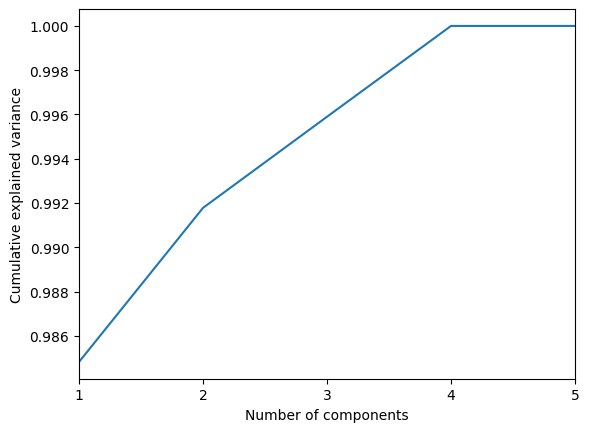

In [10]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1,5)
# plt.ylim(0,1)

In [11]:
eig_scores = np.dot(sc, sorted_eig_vectors[:, :3]) # 3 pcas
print(eig_scores)

[[-1.36350863+0.j  2.43457277+0.j -1.84901632+0.j]
 [-1.85473706+0.j  2.4167744 +0.j -1.84056964+0.j]
 [-2.60062702+0.j  2.38978027+0.j -1.83216017+0.j]
 ...
 [17.77743514+0.j -1.87033194+0.j  1.8347897 +0.j]
 [18.14283908+0.j -1.85760317+0.j  1.84337545+0.j]
 [18.5163213 +0.j -1.84459057+0.j  1.85196235+0.j]]


In [12]:
print(eig_scores.shape)
foo = eig_scores[:,2]
print(foo)

(179928, 3)
[-1.84901632+0.j -1.84056964+0.j -1.83216017+0.j ...  1.8347897 +0.j
  1.84337545+0.j  1.85196235+0.j]


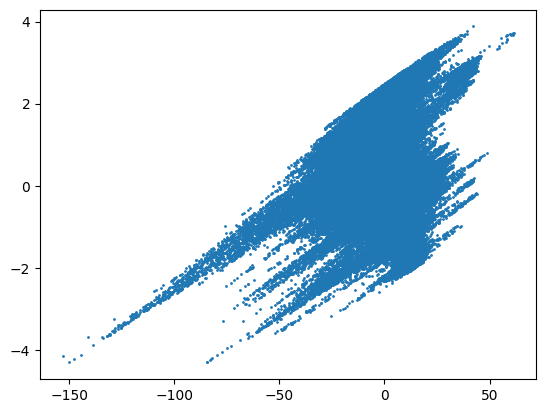

In [15]:
plt.scatter(eig_scores[:,0], eig_scores[:,1],1) # 2d thing

# ax = plt.figure().add_subplot(projection='3d')   # 3d thing
# ax.scatter(eig_scores[:,0], eig_scores[:,1], eig_scores[:,2], c = 'b', marker='o')

# plt.show()
# plt.scatter(eig_scores[:,1], eig_scores[:,2], c=y) c should be for differentiating the things

# sctt = ax.scatter3D(eig_scores[:,0], eig_scores[:,1], eig_scores[:,2])

plt.show()


NameError: name 'scores' is not defined

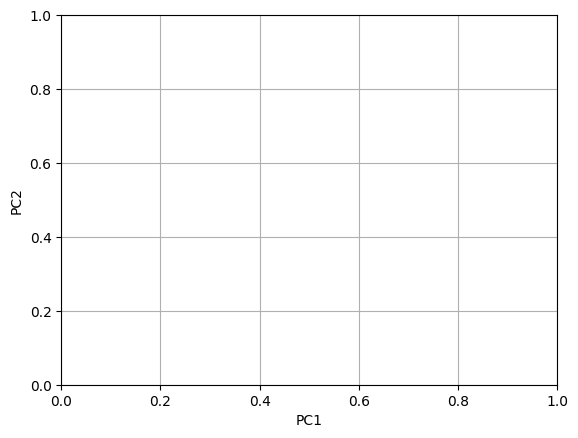

In [14]:
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i in enumerate(df):
        xi = [
            score[j, 0] for j in range(score.shape[0])# if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0])# if df["target"].tolist()[j] == u
        ]
        # plt.scatter(xi, yi, c=colors[i], label=u)
        plt.scatter(xi, yi)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot(scores, sorted_eig_vectors, iris["feature_names"])
plt.legend()